# **SVM - Support Vector Machines (Máquinas de Vetor de Suporte)**

In [4]:
# Carregando  as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Pima Indians Diabetes Dataset

Dados originalmente fornecidos pelo National Institute of Diabetes and Digestive and Kidney Diseases. O objetivo é predizer se um determinado paciente está propenso a ter diabetes ou não a partir de outros dados clínicos e laboratoriais.

Existem diversas restrições na seleção de observações. Este subconjunto dos dados contém apenas pacientes do sexo feminino com pelo menos 21 anos de idade e com descendência indígena Pima.

Variáveis:

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1)

**Resultados da árvore de decisão**
```
              precision    recall  f1-score   support
           0       0.78      0.78      0.78       157
           1       0.53      0.53      0.53        74
    accuracy                           0.70       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.70      0.70      0.70       231
```

In [5]:
# Carregando a base de dados
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('pima-indians-diabetes.csv')
pima.columns = col_names

In [6]:
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Avaliando o balanceamento da base

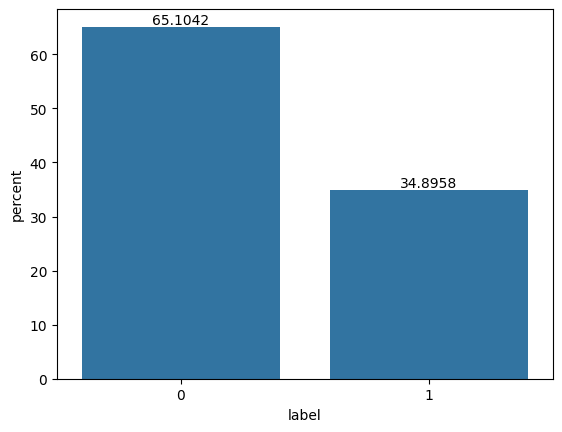

In [7]:
# Visualizando a distribuição da variável-alvo, em percentuais
ax = sns.countplot(pima, x='label', stat="percent")
ax.bar_label(ax.containers[0], fontsize=10);

In [8]:
# Separando o dataset em variáveis independentes e variável-alvo
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Variáveis independentes
y = pima.label # Variável-alvo

In [9]:
# Dividindo a base em conjuntos de Treino e Teste (70% Treino - 30% Teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
# Instanciando, treinando o modelo e aplicando o resultado na base de testes

# Instanciando o classificador
clf = svm.SVC()

# Realizando o treino
clf.fit(X_train,y_train)

# Aplicando o modelo treinado no conjunto de Teste
y_pred = pd.DataFrame(clf.predict(X_test))

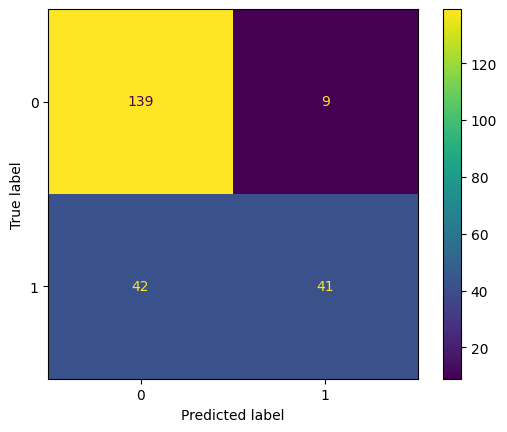

In [11]:
# Avaliando os resultados

# Matriz de confusão
# Linha: Real
# Coluna: Predito

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [12]:
# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.94      0.84       148
           1       0.82      0.49      0.62        83

    accuracy                           0.78       231
   macro avg       0.79      0.72      0.73       231
weighted avg       0.79      0.78      0.76       231



In [13]:
# Executando com outro Kernel.

# Criando um novo objeto classificador
clf = svm.SVC(kernel='linear')

# Treinando novamente o modelo
clf.fit(X_train,y_train)

# Aplicando o modelo no conjunto de Teste
y_pred = pd.DataFrame(clf.predict(X_test))

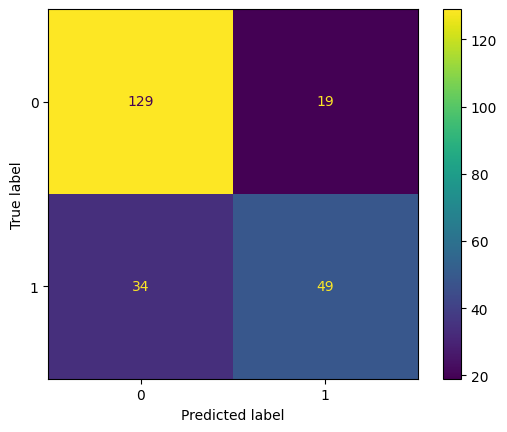

In [14]:
 # Avaliando o novo resultado

# Matriz de confusão
# Linha: Real
# Coluna: Predito

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [15]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       148
           1       0.72      0.59      0.65        83

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



# **Usando o GridSearch na busca dos melhores parâmetros**



In [16]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Instanciando o classificador
clf = svm.SVC()

param = {'kernel':['rbf','linear','poly','sigmoid'],
             'C':np.linspace(0.1, 3, 5)}
clf_gs = GridSearchCV(clf,param,cv=5,refit=True,scoring='accuracy',verbose=4)

# Realizando o treino
clf_gs.fit(X, y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.688 total time=   0.0s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.662 total time=   0.0s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.747 total time=   0.4s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.760 total time=   0.5s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.753 total time=   0.3s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.810 total time=   0.4s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.758 total time=   0.4s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.753 total time=   0.0s
[CV 2/5] END ................C=0.1, kernel=poly

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([0.1  , 0.825, 1.55 , 2.275, 3.   ]),
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=4)

In [17]:
# Armazenando e apresentando as melhores combinações de parâmetros

best_estimator = clf_gs.best_params_
print(best_estimator)

{'C': 2.275, 'kernel': 'poly'}


In [18]:
# O parâmetro refit usado no GridSearch aplica o treinamento a partir da melhor
# configuração de parâmetros.
# Vamos guardar este treinamento e aplicá-lo novamente no conjunto de testes.

# Armazenando o modelo treinado
clf_gs_refit = clf_gs.best_estimator_

# Aplicando o modelo no conjunto de testes
y_pred_refit = pd.DataFrame(clf_gs_refit.predict(X_test))

# Novo Classification Report
print(classification_report(y_test, y_pred_refit))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       148
           1       0.87      0.57      0.69        83

    accuracy                           0.81       231
   macro avg       0.83      0.76      0.78       231
weighted avg       0.82      0.81      0.80       231



## **Material extra - Armazenando um modelo treinado para uso posterior**

Vamos ver como armazenar o algoritmo treinado para uso posterior.

Armazenando o modelo utilizando a biblioteca `joblib`.

In [19]:
import joblib

joblib.dump(clf_gs_refit, 'modelo.joblib')

['modelo.joblib']

Carregando uma base que simula dados de produção.

In [20]:
# Carregando a base de dados
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima_prod = pd.read_csv('pima-indians-diabetes_Dado_Real.csv')
pima_prod.columns = col_names
pima_prod

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,5,116,70,37,0,31.6,0.795,49,1
1,2,82,66,31,0,25.9,0.314,29,0
2,0,118,84,47,230,45.8,0.551,31,1
3,2,99,52,15,94,24.6,0.637,21,0
4,1,109,56,21,135,25.2,0.833,23,0
5,1,147,94,41,0,49.3,0.358,27,1
6,2,88,74,19,53,29.0,0.229,22,0
7,8,179,72,42,130,32.7,0.719,36,1
8,6,85,78,0,0,31.2,0.382,42,0
9,0,129,110,46,130,67.1,0.319,26,1


In [21]:
# Separando o dataset em variáveis independentes e variável-alvo
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X_prod = pima_prod[feature_cols] # Variáveis independentes
y_prod = pima_prod.label # Variável-alvo

Carregando o modelo gravado em arquivo.

In [22]:
modelo_prod = joblib.load('modelo.joblib')

Aplicando o modelo na base de produção.

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.60      0.75         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



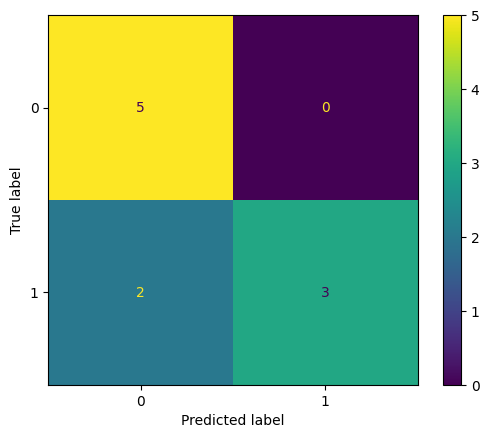

In [23]:
# Aplicando o modelo no conjunto de testes
y_pred_prod = pd.DataFrame(modelo_prod.predict(X_prod))

# Matriz de confusão
cm = confusion_matrix(y_prod, y_pred_prod)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Classification Report
print(classification_report(y_prod, y_pred_prod))